In [1]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime
import matplotlib.pyplot as plt
from citipy import citipy
from api_keys import weather_api_key as api_key

In [8]:
lat_range = (-150, 150)
lng_range = (-150, 150)

# Create list that will hold, city names
cities = []
lat_lngs = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [11]:
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

In [12]:
# Print number of cities
lat_lngs_list = list(lat_lngs)
print(len(cities))

604


In [23]:
# Url for openweather API with imperial units, Fahrenheit
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []


In [24]:
# Loop through cities making the API call
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    try:  
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"City number: {i}\t City name: {city}")
        i+=1
    except:
        print("City record not found.")

City number: 1	 City name: port alfred
City number: 2	 City name: provideniya
City number: 3	 City name: tiznit
City number: 4	 City name: bluff
City number: 5	 City name: coihaique
City number: 6	 City name: arraial do cabo
City number: 7	 City name: saint-philippe
City number: 8	 City name: muravlenko
City number: 9	 City name: hobart
City number: 10	 City name: lagos
City record not found.
City number: 11	 City name: carnarvon
City number: 12	 City name: kisangani
City number: 13	 City name: curaca
City number: 14	 City name: nanortalik
City number: 15	 City name: severo-kurilsk
City number: 16	 City name: avarua
City record not found.
City number: 17	 City name: yellowknife
City number: 18	 City name: saskylakh
City number: 19	 City name: sabalgarh
City number: 20	 City name: mataura
City number: 21	 City name: atuona
City number: 22	 City name: butaritari
City record not found.
City number: 23	 City name: pevek
City number: 24	 City name: rikitea
City number: 25	 City name: nuuk
C

In [25]:
city_df = pd.DataFrame({"City":city_name, 
                        "Cloudiness":cloudiness, 
                        "Country":country, 
                        "Date":date, 
                        "Humidity":humidity,
                        "Latitude":lat,
                        "Longitude":lng,
                        "Max Temperature":max_temp,
                        "Wind Speed":wind_speed
                                         })
city_df = city_df.rename_axis('ID')
city_df.head()

City  Cloudiness Country        Date  Humidity  Latitude  \
ID                                                                        
0       Port Alfred         100      ZA  1618223843        75  -33.5906   
1       Provideniya         100      RU  1618223843        89   64.3833   
2   Tiznit Province          78      MA  1618223844        39   29.5833   
3             Bluff          70      NZ  1618223845        93  -46.6000   
4         Coyhaique          98      CL  1618223845        93  -45.5752   

    Longitude  Max Temperature  Wind Speed  
ID                                          
0     26.8910            74.35       14.12  
1   -173.3000             9.73       22.88  
2     -9.5000            72.88        7.14  
3    168.3333            54.00        1.01  
4    -72.0662            51.80        2.30

In [26]:
city_df.to_csv("weather_data.csv")

In [33]:
north = city_df.loc[city_df['Latitude'] >= 0]
north.reset_index()
north.head()

City  Cloudiness Country        Date  Humidity  Latitude  \
ID                                                                        
1       Provideniya         100      RU  1618223843        89   64.3833   
2   Tiznit Province          78      MA  1618223844        39   29.5833   
7        Muravlenko          47      RU  1618223847        91   63.7898   
9             Lagos          20      NG  1618223766        55    6.5833   
11        Kisangani          40      CD  1618223850        66    0.5167   

    Longitude  Max Temperature  Wind Speed  
ID                                          
1    -173.300             9.73       22.88  
2      -9.500            72.88        7.14  
7      74.523            33.58       19.71  
9       3.750            89.60        3.44  
11     25.200            86.00        4.61

In [34]:
south = city_df.loc[city_df['Latitude'] < 0]
south.reset_index()
south.head()

City  Cloudiness Country        Date  Humidity  Latitude  \
ID                                                                        
0       Port Alfred         100      ZA  1618223843        75  -33.5906   
3             Bluff          70      NZ  1618223845        93  -46.6000   
4         Coyhaique          98      CL  1618223845        93  -45.5752   
5   Arraial do Cabo           0      BR  1618223846        83  -22.9661   
6    Saint-Philippe          75      RE  1618223846        70  -21.3585   

    Longitude  Max Temperature  Wind Speed  
ID                                          
0     26.8910            74.35       14.12  
3    168.3333            54.00        1.01  
4    -72.0662            51.80        2.30  
5    -42.0278            75.20        5.75  
6     55.7679            84.20       10.36

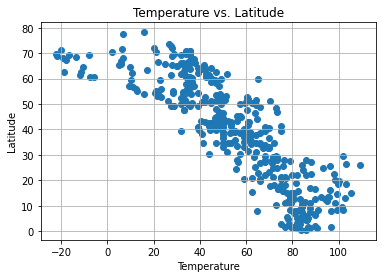

In [35]:
plt.scatter(north["Max Temperature"], north["Latitude"])
plt.grid()
plt.xlabel("Temperature")
plt.ylabel("Latitude")
plt.title("Temperature vs. Latitude")
plt.savefig("Temp_Lat_N_plot")
plt.show()

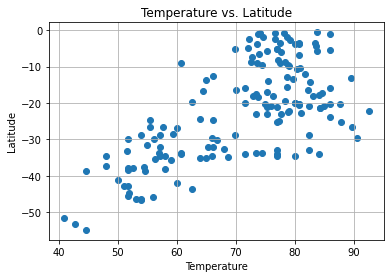

In [36]:
plt.scatter(south["Max Temperature"], south["Latitude"])
plt.grid()
plt.xlabel("Temperature")
plt.ylabel("Latitude")
plt.title("Temperature vs. Latitude")
plt.savefig("Temp_Lat_S_plot")
plt.show()

#### The cities closer to the equator are warmer while those away are colder

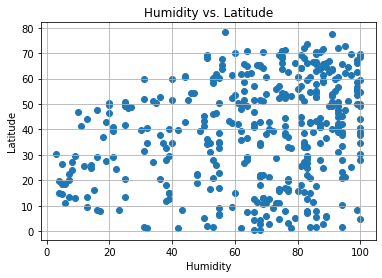

In [37]:
plt.scatter(north["Humidity"], north["Latitude"])
plt.grid()
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.title("Humidity vs. Latitude")
plt.savefig("Hum_Lat_N_plot")
plt.show()

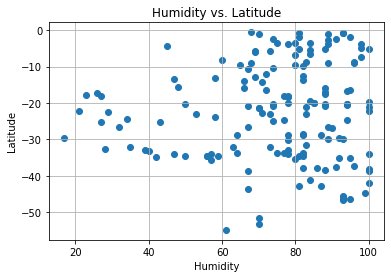

In [38]:
plt.scatter(south["Humidity"], south["Latitude"])
plt.grid()
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.title("Humidity vs. Latitude")
plt.savefig("Hum_Lat_S_plot")
plt.show()

#### The relation between humidity and latitude is almost random across the board.

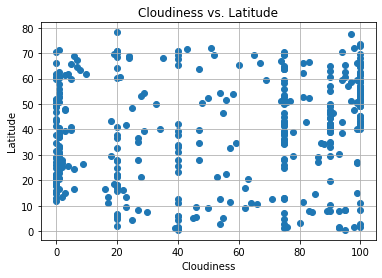

In [42]:
plt.scatter(north["Cloudiness"], north["Latitude"])
plt.grid()
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.title("Cloudiness vs. Latitude")
plt.savefig("Clo_Lat_N_plot")
plt.show()

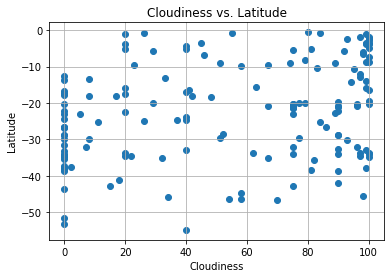

In [40]:
plt.scatter(south["Cloudiness"], south["Latitude"])
plt.grid()
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.title("Cloudiness vs. Latitude")
plt.savefig("Clo_Lat_S_plot")
plt.show()

#### Similar to the humidity plot, relation between cloudiness and latitude is almost random.

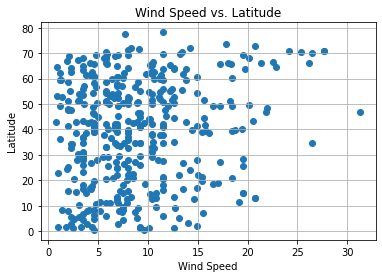

In [43]:
plt.scatter(north["Wind Speed"], north["Latitude"])
plt.grid()
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.title("Wind Speed vs. Latitude")
plt.savefig("Wnd_Lat_N_plot")
plt.show()

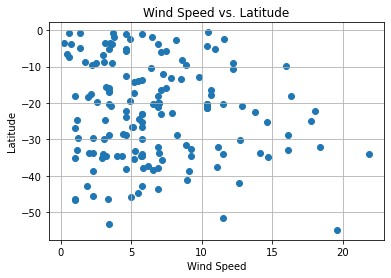

In [44]:
plt.scatter(south["Wind Speed"], south["Latitude"])
plt.grid()
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.title("Wind Speed vs. Latitude")
plt.savefig("Wnd_Lat_S_plot")
plt.show()

### Higher wind speeds happen in the southern and northern hemisphere areas known for hurricanes.